<a href="https://colab.research.google.com/github/neonithinar/ML_and_DL_learning_materials_and_tryouts/blob/master/chapter_11_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import matplotlib as mpl


[name for name in dir(keras.activations) if not name.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

# Leaky Relu and Relu

In [ ]:
z = np.linspace(-5, 5, 200)
def leaky_relu(Z, alpha = 0.01):
  return np.maximum(alpha*z, z)
  


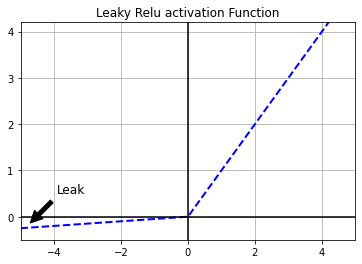

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b--", linewidth = 2)
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([0, 0], [-0.5, 4.2], "k-")
plt.grid(True)
props = dict(facecolor = 'black', shrink = 0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy = (-4.8, -0.2), arrowprops = props, fontsize =12, ha='center')
plt.title("Leaky Relu activation Function")
plt.axis([-5, 5, -0.5, 4.2])
plt.show()


In [ ]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000] , X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_valid.shape)

4423680/4422102 [==============================] - 0s 0us/step
(5000, 28, 28)


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
for layer in range(99):
  model.add(keras.layers.Dense(100, activation= 'selu', kernel_initializer='lecun_normal'))

model.add(keras.layers.Dense(10, activation= 'softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = keras.optimizers.SGD(lr=1e-3), metrics = ['accuracy'])

In [ ]:
pixel_means= X_train.mean(axis = 0, keepdims= True)
pixel_std = X_train.std(axis= 0, keepdims= True)
X_train_scaled = (X_train - pixel_means) / pixel_std
X_valid_scaled = (X_valid - pixel_means) / pixel_std
X_test_scaled = (X_test - pixel_means) / pixel_std


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs= 15, validation_data = (X_valid_scaled, y_valid))

Epoch 1/15
1441/1719 [========================>.....] - ETA: 2s - loss: 1.1922 - accuracy: 0.5416

KeyboardInterrupt: ignored

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

In [ ]:
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]


In [ ]:
X_train_A.shape  

In [ ]:
X_train_B.shape

In [ ]:
y_train_A[:20]

In [ ]:
y_train_B[:20]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape= [28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
  model_A.add(keras.layers.Dense(n_hidden, activation= 'selu', kernel_initializer='lecun_normal'))
model_A.add(keras.layers.Dense(8, activation= 'softmax'))

In [ ]:
model_A.compile(loss = 'sparse_categorical_crossentropy', optimizer= keras.optimizers.SGD(lr= 1e-3), metrics= ['accuracy'])


In [ ]:
history= model_A.fit(X_train_A, y_train_A, epochs= 20, validation_data= (X_valid_A, y_valid_A))

In [ ]:
model_A.save("my_model_A.h5")

In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

In [ ]:
model_B.summary()

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False

model_B_on_A.compile(loss= 'binary_crossentropy', optimizer= keras.optimizers.SGD(lr= 1e-3), metrics= ['accuracy'])


In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

In [ ]:
model_B.evaluate(X_test_B, y_test_B)


In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

#Deep Learning on CIFAR10

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [32, 32, 3]))
for _ in range(20):
  model.add(keras.layers.Dense(100, activation= 'elu', kernel_initializer= 'he_normal'))



In [ ]:
model.add(keras.layers.Dense(10, activation= 'softmax'))


In [ ]:
optimizer= keras.optimizers.Nadam(lr= 5e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer, metrics= ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train= X_train_full[5000:]
X_valid= X_train_full[:5000]
y_train= y_train_full[5000:]
y_valid= y_train_full[:5000]

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
import os
early_stopping_cb= keras.callbacks.EarlyStopping(patience= 20)
path = os.path.join("/home/nithin/scikit_learn_data/DL_Data/My_cifar10_model.h5")
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath= path, save_best_only= True)
run_index= 1 # Increment every time you train the model
run_logdir= os.path.join(os.curdir, 'my_cifar10_logs', 'run_{:03d}'.format(run_index))
tensorboard_cb= keras.callbacks.TensorBoard(run_logdir)
callbacks= [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]


In [ ]:
%tensorboard --logdir= ./my_cifar_logs --port=6006
  

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
model.fit(X_train, y_train, epochs= 100, validation_data= (X_valid, y_valid), callbacks= callbacks)



Epoch 1/100
   1/1407 [..............................] - ETA: 0s - loss: 165.9659 - accuracy: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 19s 14ms/step - loss: 4.1781 - accuracy: 0.1531 - val_loss: 2.1874 - val_accuracy: 0.2122
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 2.0855 - accuracy: 0.2252 - val_loss: 2.0813 - val_accuracy: 0.2294
Epoch 3/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.9559 - accuracy: 0.2755 - val_loss: 1.9603 - val_accuracy: 0.2746
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8709 - accuracy: 0.3142 - val_loss: 1.8880 - val_accuracy: 0.3190
Epoch 5/100
1407/1407 [=======================

In [ ]:
model= keras.models.load_model(path)
model.evaluate(X_valid, y_valid)

OSError: ignored

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
  model.add(keras.layers.Dense(100, kernel_initializer= 'he_normal'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation= 'softmax'))

opti= keras.optimizers.Nadam(lr= 5e-4)
model.compile(loss='sparse_categorical_crossentropy', optimizer= opti, metrics= ['accuracy'])
early_stopping_cb= keras.callbacks.EarlyStopping(patience= 20)
model_checkpoint_cb= keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.h5', save_best_only=True)
run_index= 1
run_logdir= os.path.join(os.curdir, 'my_cifar10_logs', "run_bn_{:03d}".format(run_index))
tensorboard_cb= keras.callbacks.TensorBoard(run_logdir)
callbacks= [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs= 100, validation_data= (X_valid, y_valid), callbacks=callbacks)

model= keras.models.load_model('my_cifar10_bn_model.h5')
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.8360 - accuracy: 0.3430 - val_loss: 1.6268 - val_accuracy: 0.4190
Epoch 2/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.6664 - accuracy: 0.4059 - val_loss: 1.5932 - val_accuracy: 0.4270
Epoch 3/100
1407/1407 [==============================] - 44s 31ms/step - loss: 1.5959 - accuracy: 0.4335 - val_loss: 1.5312 - val_accuracy: 0.4408
Epoch 4/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.5479 - accuracy: 0.4491 - val_loss: 1.5208 - val_accuracy: 0.4636
Epoch 5/100
1407/1407 [==============================] - 42s 30ms/step - loss: 1.5027 - accuracy: 0.4688 - val_loss: 1.4622 - val_accuracy: 0.4806
Epoch 6/100
1407/1407 [==============================] - 43s 30ms/step - loss: 1.4669 - accuracy: 0.4793 - val_loss: 1.4156 - val_accuracy: 0.4998
Epoch 7/100
1407/1407 [==============================] - 44s 31ms/step - loss: 1.4307 - accuracy: 0.4915 - val_loss: 1

[1.3133240938186646, 0.09000000357627869]

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.3352 - accuracy: 0.0940


[1.335156798362732, 0.09399999678134918]

# CIFAR10 model with SELU, LeChun normalinitialisation

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import os

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)


Epoch 1/100
   1/1407 [..............................] - ETA: 0s - loss: 3.0445 - accuracy: 0.1250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 40s 28ms/step - loss: 1.8401 - accuracy: 0.3410 - val_loss: 1.6509 - val_accuracy: 0.4068
Epoch 2/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.6690 - accuracy: 0.4062 - val_loss: 1.5877 - val_accuracy: 0.4304
Epoch 3/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.5991 - accuracy: 0.4304 - val_loss: 1.5214 - val_accuracy: 0.4486
Epoch 4/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.5452 - accuracy: 0.4499 - val_loss: 1.5106 - val_accuracy: 0.4622
Epoch 5/100
1407/1407 [=========================

In [ ]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)


In [ ]:

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import os

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

history = model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)


Epoch 1/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.9121 - accuracy: 0.3149 - val_loss: 1.8186 - val_accuracy: 0.3528
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6943 - accuracy: 0.4009 - val_loss: 1.7427 - val_accuracy: 0.3538
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5999 - accuracy: 0.4359 - val_loss: 1.6724 - val_accuracy: 0.4000
Epoch 4/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5355 - accuracy: 0.4580 - val_loss: 1.6465 - val_accuracy: 0.4282
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4773 - accuracy: 0.4808 - val_loss: 1.5791 - val_accuracy: 0.4540
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4367 - accuracy: 0.4970 - val_loss: 1.5198 - val_accuracy: 0.4638
Epoch 7/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.3923 - accuracy: 0.5133 - val_loss: 1

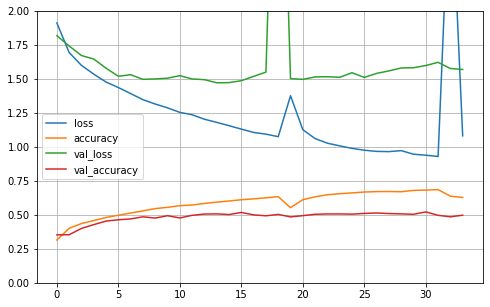

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()


In [ ]:

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.4717 - accuracy: 0.1112


[1.4716901779174805, 0.1111999973654747]

In [ ]:
X_train_scaled.shape


(45000, 32, 32, 3)

In [ ]:
X_valid_scaled.shape

(5000, 32, 32, 3)